In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

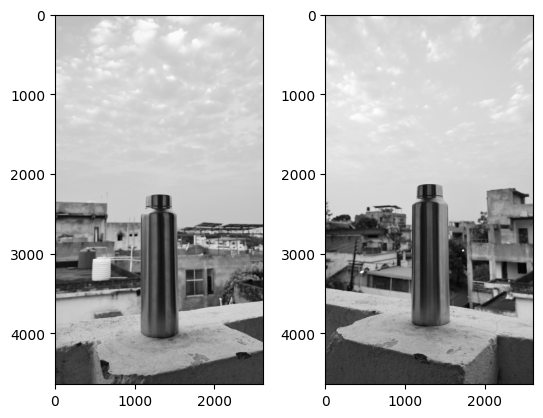

In [2]:
# Load the two images in grayscale
img1 = cv2.imread('bottle1.jpg')
img2 = cv2.imread('bottle2.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap="gray")

In [14]:
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher (Brute Force) to match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)


In [4]:
original_img1 = cv2.imread('bottle1.jpg')
original_img2 = cv2.imread('bottle2.jpg')

# Convert images from bgr to rgb
original_img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2RGB)
original_img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2RGB)

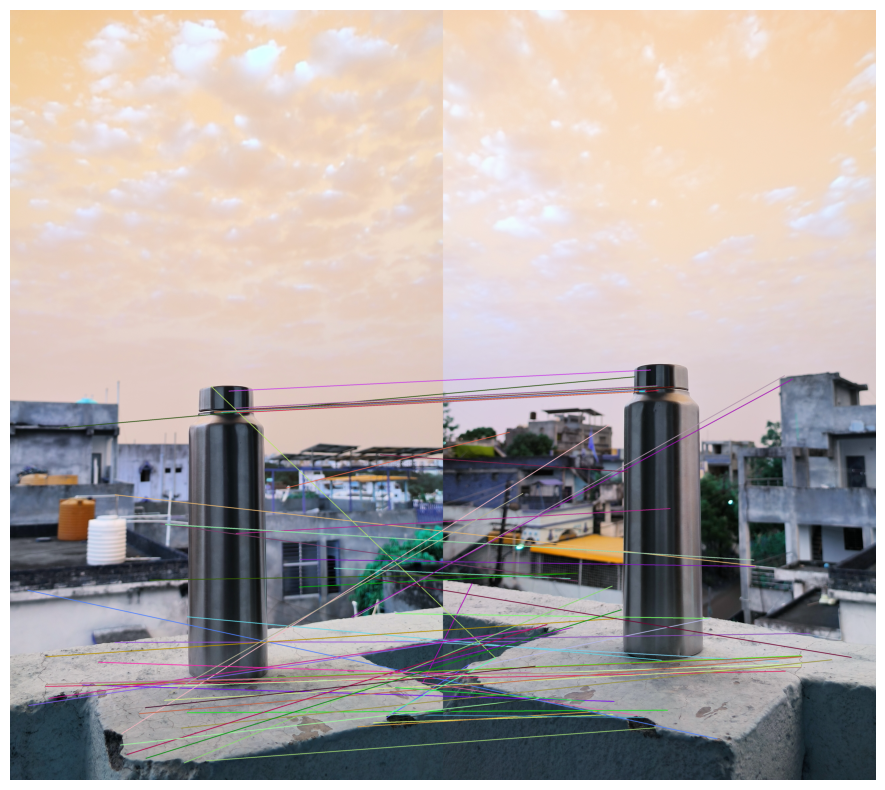

In [15]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Sort matches by distance (best matches first)
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Combine images side by side
combined_img = np.hstack((original_img1, original_img2))

# Draw matches manually with thicker lines
for match in good_matches:
    pt1 = tuple(np.round(kp1[match.queryIdx].pt).astype(int))
    pt2 = tuple(np.round(kp2[match.trainIdx].pt).astype(int) + np.array([img1.shape[1], 0]))  # shift pt2 for right image

    color = tuple(np.random.randint(0, 255, 3).tolist())  # random line color
    cv2.line(combined_img, pt1, pt2, color, thickness=3)

# Show result
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()